In [38]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from pydub import AudioSegment
from IPython.display import Audio

In [39]:
# Load the saved model
model = load_model("test_m.keras")
print("Model loaded successfully!")
model.trainable = False  # Make sure dropout layers are disabled during inference

Model loaded successfully!


# Random testing

Here we will chose a random spectrogram from the dataset and we will print it's actual class, and predicted class. Then we will print its spectrogram and play the corresponding audio clip! Hopefully this will work live in class.

File Path: /Users/solomongreene/DIS/DIS Core Course/data/spectrograms_windowed_dataset/American Redstart/XC193769_17.png
True Class: American Redstart
Predicted Class: American Redstart


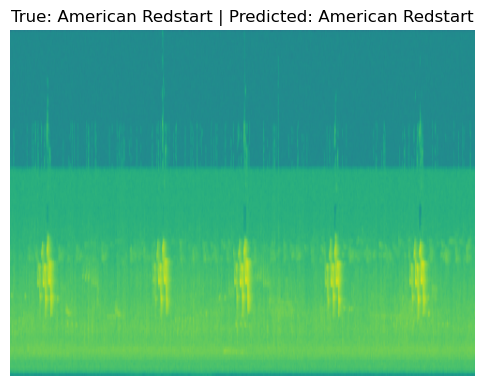

Transformed Path: /Users/solomongreene/DIS/DIS Core Course/data/bird_dataset/Setophaga ruticilla_American Redstart/XC193769.wav, Suffix: 17


In [72]:
# Define the necessary variables
data_dir = os.getcwd() + "/data/spectrograms_windowed_dataset"
img_size = (224, 224)  
class_names = sorted(os.listdir(data_dir))  # Infer class names from directory structure
class_names = [name for name in class_names if os.path.isdir(os.path.join(data_dir, name))]  # Filter out non-directory files

# Function to decode label
def decode_label(label):
    return class_names[label]

# Choose a random image
class_dirs = [os.path.join(data_dir, class_name) for class_name in class_names]
random_class_dir = random.choice(class_dirs)
random_image = random.choice(os.listdir(random_class_dir))
image_path = os.path.join(random_class_dir, random_image)

# Load and preprocess the image
image = tf.keras.utils.load_img(image_path, target_size=img_size)
image_array = tf.keras.utils.img_to_array(image) / 255.0  # Normalize to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Get the true class name
true_label = os.path.basename(random_class_dir)

# Predict the class
prediction = model.predict(image_array, verbose=0)
predicted_label = np.argmax(prediction, axis=1)[0]

# Print results
print(f"File Path: {image_path}")
print(f"True Class: {true_label}")
print(f"Predicted Class: {decode_label(predicted_label)}")

# Display spectrogram
plt.figure(figsize=(6, 6))
plt.imshow(tf.keras.utils.load_img(image_path))  # Display the image
plt.title(f"True: {true_label} | Predicted: {decode_label(predicted_label)}")
plt.axis("off")
plt.show()

# Define folder name mapping
folder_name_mapping = {
    "Black-and-white Warbler": "Mniotilta varia_Black-and-white Warbler",
    "Magnolia Warbler": "Setophaga magnolia_Magnolia Warbler",
    "Common Yellowthroat": "Geothlypis trichas_Common Yellowthroat", 
    "Prothonotary Warbler": "Protonotaria citrea_Prothonotary Warbler", 
    "Ovenbird": "Seiurus aurocapilla_Ovenbird", 
    "American Yellow Warbler": "Setophaga aestiva_American Yellow Warbler", 
    "Black-throated Blue Warbler": "Setophaga caerulescens_Black-throated Blue Warbler", 
    "Cerulean Warbler": "Setophaga cerulea_Cerulean Warbler", 
    "Hooded Warbler": "Setophaga citrina_Hooded Warbler", 
    "Myrtle Warbler": "Setophaga coronata_Myrtle Warbler", 
    "Prairie Warbler": "Setophaga discolor_Prairie Warbler", 
    "Yellow-throated Warbler": "Setophaga dominica_Yellow-throated Warbler", 
    "Blackburnian Warbler": "Setophaga fusca_Blackburnian Warbler", 
    "Chestnut-sided Warbler": "Setophaga pensylvanica_Chestnut-sided Warbler", 
    "Pine Warbler": "Setophaga pinus_Pine Warbler", 
    "American Redstart": "Setophaga ruticilla_American Redstart", 
    "Cape May Warbler": "Setophaga tigrina_Cape May Warbler", 
    "Black-throated Green Warbler": "Setophaga virens_Black-throated Green Warbler", 
    "Golden-winged Warbler": "Vermivora chrysoptera_Golden-winged Warbler", 
    "Blue-winged Warbler": "Vermivora cyanoptera_Blue-winged Warbler"
}

# Transform file path
def transform_file_path(original_path):
    old_folder = "spectrograms_windowed_dataset"
    new_folder = "bird_dataset"
    
    path_parts = original_path.split(os.sep)
    old_folder_index = path_parts.index(old_folder)
    bird_folder = path_parts[old_folder_index + 1]
    file_name = path_parts[-1]
    
    file_stem = os.path.splitext(file_name)[0]
    suffix_number = None
    if "_" in file_stem:
        file_stem, suffix = file_stem.rsplit("_", 1)
        if suffix.isdigit():
            suffix_number = int(suffix)
    
    new_file_name = f"{file_stem}.wav"
    new_bird_folder = folder_name_mapping[bird_folder]
    new_path_parts = (
        path_parts[:old_folder_index] + 
        [new_folder, new_bird_folder, new_file_name]
    )
    transformed_path = os.sep.join(new_path_parts)
    return transformed_path, suffix_number

transformed_path1, suffix1 = transform_file_path(image_path)
print(f"Transformed Path: {transformed_path1}, Suffix: {suffix1}")

# Play audio segment
def play_audio_segment(file_path, suffix_number):
    try:
        audio = AudioSegment.from_file(file_path)
        start_time = (suffix_number - 1) * 10 * 1000
        end_time = start_time + 30 * 1000
        audio_segment = audio[start_time:end_time]
        audio_segment.export("temp_audio_clip.wav", format="wav")
        return Audio("temp_audio_clip.wav")
    except Exception as e:
        print(f"Error: Could not play audio. {e}")

audio_player = play_audio_segment(transformed_path1, suffix1)
audio_player
